In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.integrate import simpson
import matplotlib.pyplot as plt
import calculation_functions as cf

In [2]:
# building parameters
thickness = cf.thickness
length = cf.length
height = cf.height
setup_height = cf.setup_height

In [55]:
def our_plot(x, y, title, xlabel, ylabel, labels=[' '],xmin=0, xmax=90, save=''):
    plt.figure(figsize=(6.7, 6))  # (width, height in inches)

    color = ['b', 'orange', 'green']
    for i in range(len(y)):
        plt.plot(x, y[i], label=labels[i], color=color[i], linewidth = 2)
    
    plt.title(title, fontsize=14)#, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    
    plt.xlim(xmin, xmax)
    #plt.ylim(0, 7e6)
    
    # plt.xticks(np.arange(0, 11, 2))  # Set x-ticks at 0, 2, 4, 6, 8, 10
    # plt.yticks(np.arange(0, 9, 1))   # Set y-ticks at 0, 1, 2, ... 8
    
    plt.tick_params(axis='both', which='major', labelsize=10, direction='in')

    #plt.legend(loc='upper right', fontsize=10)

    
    # plt.legend(loc='upper right', fontsize=10)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()

    if save:
        print("Saving Image...")
        plt.savefig(save)
    
    plt.show()

# Plots

### Pathlength

In [56]:
ceiling = cf.ceil_b(thickness, height, setup_height)
t = cf.thetas(0, 90.5, 1)

tot_path = np.array([cf.total_path(theta, ceiling, length) for theta in t[1]])

Saving Image...


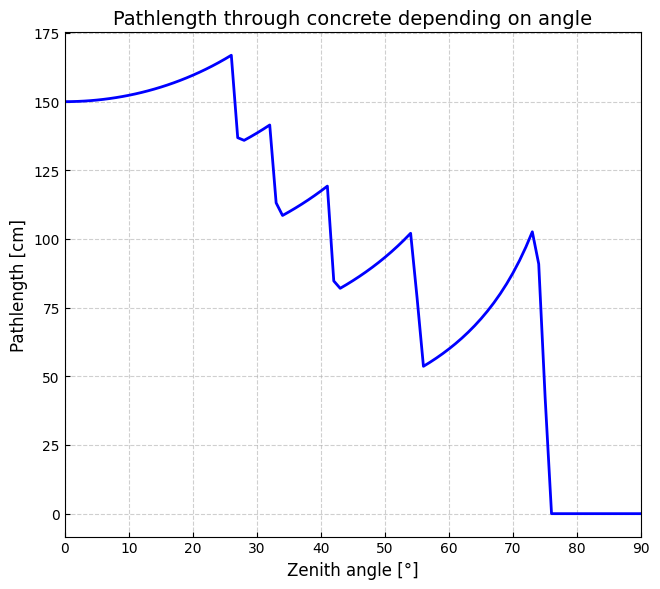

In [57]:
our_plot(t[0],
         np.array([tot_path]),
         'Pathlength through concrete depending on angle',
         'Zenith angle [°]',
         'Pathlength [cm]',
          save='pathlength_b.png')

### Calculate complete energy loss

$E_{loss} = \frac{dE}{dx} * \rho * l$

In [58]:
ceiling = cf.ceil_b(thickness, height, setup_height)
t = cf.thetas(0, 90.5, 1)

En_loss = np.array([cf.E_loss(theta, ceiling, length, cf.dEdx, cf.rho) for theta in t[1]])

Saving Image...


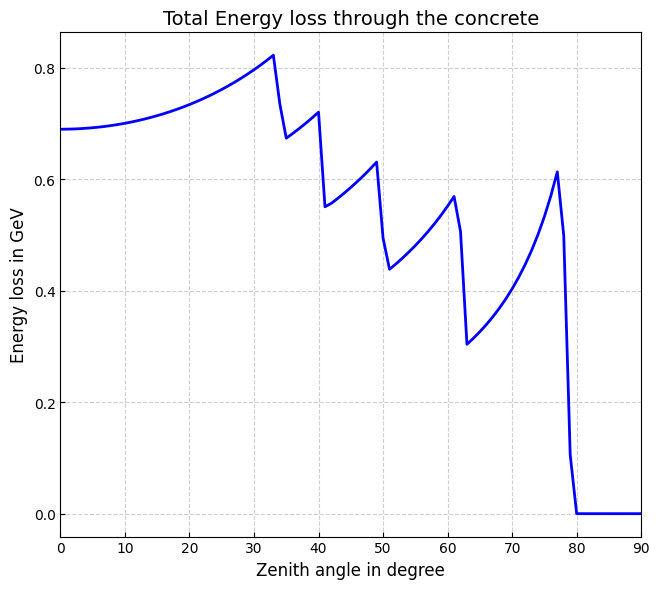

In [59]:
our_plot(t[0],
         np.array([En_loss]),
         'Total Energy loss through the concrete',
         'Zenith angle in degree',
         'Energy loss in GeV',
          save='energy_loss.png')

### Calculate muon flux from Shukla equation

$I(E, \theta) = I_0 N (E_0 + E)^{-n} D(\theta)^{-(n-1)}$

$D_2(\theta) = \frac{1}{cos(\theta)}$

In [8]:
theta_starts = cf.thetas(0, 90, cf.binsize)
ceiling_b = cf.ceil_b(thickness, height, setup_height)
ceiling_3 = cf.ceil_3(thickness, height, setup_height)

In [9]:
I_3floor = np.array([cf.I_in(cf.mean_theta(theta), ceiling_3, length) for theta in theta_starts[1]])
I_3floor

array([62.73691039, 61.7212531 , 59.72259303, 56.8052299 , 53.06312045,
       48.61697096, 43.61049728, 38.20596334, 32.57912864, 26.91374864,
       21.39577648, 16.20740363, 11.52103501,  7.49317567,  4.25785429,
        1.91800223,  1.27960043,  0.18375763])

In [10]:
I_basement = np.array([cf.I_in(cf.mean_theta(theta), ceiling_b, length) for theta in theta_starts[1]])
I_basement

array([38.55538522, 37.8138865 , 36.35991673, 34.2504775 , 31.5684607 ,
       28.41958128, 24.92838996, 24.22740142, 23.31246432, 18.77695953,
       17.42308302, 12.90079919, 10.42742159,  7.49317567,  4.25785429,
        1.91800223,  1.27960043,  0.18375763])

In [11]:
theta_samples = np.linspace(0, np.pi/2, 2000)

y_samples = np.array([cf.I_in_int(t, ceiling_3, length) for t in theta_samples])

result = simpson(y_samples, x=theta_samples)

print(f"Result 3rd floor: {result} Hz/m²")

Result 3rd floor: 124.61911635045942 Hz/m²


In [12]:
theta_samples = np.linspace(0, np.pi/2, 2000)

y_samples = np.array([cf.I_in_int(t, ceiling_b, length) for t in theta_samples])

result = simpson(y_samples, x=theta_samples)

print(f"Result inside: {result} Hz/m²")

Result inside: 85.58715384987346 Hz/m²


In [13]:
74/117.33

0.6306997357879486

In [14]:
32451/50980

0.6365437426441742

In [15]:
5/8

0.625

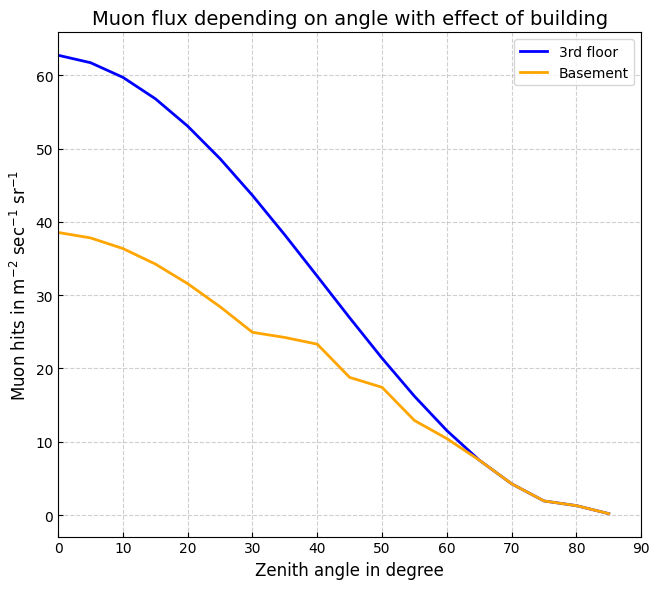

In [16]:
our_plot(theta_starts[0], np.array([I_3floor, I_basement]),
         'Muon flux depending on angle with effect of building',
         'Zenith angle in degree',
         r'Muon hits in $\text{m}^{-2} \text{ sec}^{-1} \text{ sr}^{-1}$',
         ['3rd floor', 'Basement'])

## Certain Angle Measurement

In [17]:
acc_angle = 33.32 # °
anglerad = 0.283
anglerad = np.deg2rad(acc_angle)
d_area = 0.1600 # m²
four_h = 4 * 60 * 60

In [18]:
basemuons = cf.muon_flux(thickness, height, setup_height, cf.ceil_b, anglerad)
basemuons # Hz/m²

np.float64(32.23478623260113)

In [19]:
basemuons_s = basemuons * d_area
basemuons_s # Hz

np.float64(5.157565797216181)

In [20]:
basemuons4 = basemuons_s * four_h
basemuons4

np.float64(74268.94747991301)

In [21]:
labmuons = cf.muon_flux(thickness, height, setup_height, cf.ceil_1, anglerad)
labmuons

np.float64(41.12904199828037)

In [22]:
labmuons_s = labmuons * d_area
labmuons_s

np.float64(6.58064671972486)

In [23]:
labmuons4 = labmuons_s * four_h
labmuons4

np.float64(94761.31276403798)

In [24]:
topmuons = cf.muon_flux(thickness, height, setup_height, cf.ceil_3, anglerad)
topmuons

np.float64(54.23471323409446)

In [25]:
topmuons_s = topmuons * d_area
topmuons_s

np.float64(8.677554117455113)

In [26]:
topmuons4 = topmuons_s * four_h
topmuons4

np.float64(124956.77929135363)

In [27]:
print("-1/3: ", basemuons4/topmuons4)
print("-1/1: ", basemuons4/labmuons4)
print("1/3: ", labmuons4/topmuons4)

-1/3:  0.594357088115603
-1/1:  0.7837475580867866
1/3:  0.758352714446082


In [28]:
print("-1/3: ", 32451/50930)
print("-1/1: ", 32451/37052)
print("1/3: ", 37052/50930)

-1/3:  0.6371686628706067
-1/1:  0.875823167440354
1/3:  0.7275083447869625


In [29]:
4499/8222

0.5471904646071516

In [30]:
32451/4/60/60

2.2535416666666666

In [31]:
37052/4/60/60

2.5730555555555554

In [32]:
50930/4/60/60

3.5368055555555555

## Calculate muon flux depending on wall thickness

In [33]:
cf.muon_flux(100, 250, 0)

np.float64(49.403622594905386)

In [34]:
t = np.arange(0, 200, 1)
flux_t = np.array([cf.muon_flux(thick, height, setup_height, cf.ceil_3, angle=anglerad)*0.16*4*60*60 for thick in t])
flux_t

array([145719.97655471, 144947.58382886, 144181.2729411 , 143420.98034901,
       142666.64333763, 141918.20000655, 141175.58925723, 140438.75078054,
       139707.62504459, 138982.15328271, 138262.27748165, 137547.94037004,
       136839.08540702, 136135.65677109, 135437.59934912, 134744.85872562,
       134057.38117213, 133375.11363686, 132698.00373449, 132025.99973609,
       131359.05055935, 130697.10575881, 130040.11551645, 129388.03063226,
       128740.8025151 , 128098.38317368, 127460.72520766, 126827.78179899,
       126199.50670328, 125575.85424144, 124956.77929135, 124342.23727979,
       123732.18417439, 123126.5764758 , 122525.37120995, 121928.52592047,
       121335.9986612 , 120747.74798888, 120163.73295588, 119583.91310316,
       119008.24845325, 118436.6995034 , 117869.22721883, 117305.79302609,
       116746.35880652, 116190.88688986, 115639.3400479 , 115091.6814883 ,
       114547.87484843, 114007.88418943, 113471.67399024, 112939.20914181,
       112410.45494138, 1

In [35]:
np.where(np.isclose(flux_t, 50993.93227552))

(array([], dtype=int64),)

In [36]:
t.shape

(200,)

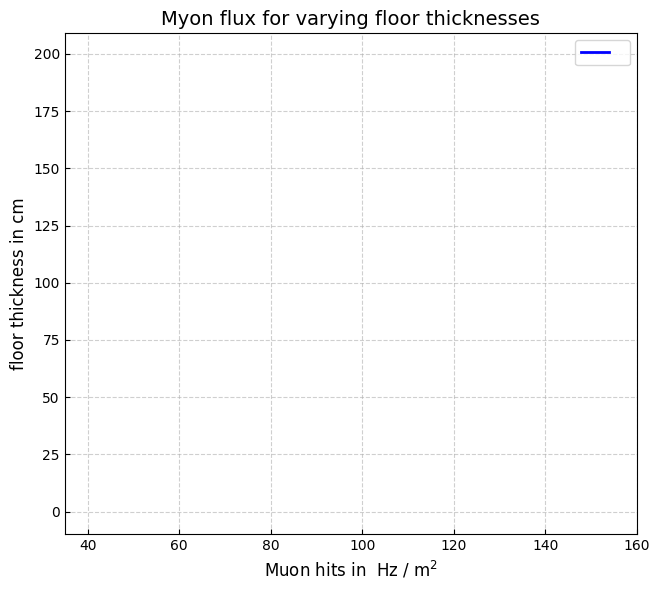

In [37]:
our_plot(flux_t, np.array([t]),
         'Myon flux for varying floor thicknesses',
         r'Muon hits in $\text{ Hz }/\text{ m}^{2}$',
         'floor thickness in cm',
        xmin=35,
        xmax=160)

In [38]:
np.rad2deg(np.arccos(0.836601))

np.float64(33.21708485930459)